<font size="5">**Suicide Analysis in India**</font>

This dataset comprises of yearly suicide detail of all the states and union territories of India by various parameters from 2001 to 2012

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print("The file name for the analysis is Suicides in India 2001-2012.csv file")

The file name for the analysis is Suicides in India 2001-2012.csv file


In [2]:
#Reading the dataset
suicide_dataset = pd.read_csv("Suicides in India 2001-2012.csv")

In [3]:
suicide_dataset.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


<font size="5">**Data Pre-Processing**</font>

Data Preprocessing is a technique that is used to convert the raw data into a clean data set.
Therefore we perform few preprocessing to make this dataset clean

1. Checking for missing values in the dataset
2. Remove those data records which has values 0-100+ in age-group field which would make our dataset unclear for analysis
3. We remove those records which has the cause type of suicide as illegitimate pregnancy for gender 'Male' which seems to be illogical 
4. We remove or drop records that doesnt specify any cause for suicide attempt
5. We remove or drop records that doesnt specify any profession of the suicide 
6. The dataset consists of records that specifies profession_profile as house wife for gender male which is said to be illogical.Therefore we replace the gender with male.
7. The dataset consists of records that specifies age group as 60+ which isnt appropriate.Therefore we replace them with random age values between 60 and 100




**1. Checking for missing values**

In [4]:
suicide_dataset.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

**Conclusion:** There are no missing values in the dataset.

**2. The dataset consists of age groups with entries 0-100+ which is not clear for our analysis.Therefore we remove those records**

In [5]:
#Removing the records which has age groups 0-100+
suicide_dataset = suicide_dataset[suicide_dataset['Age_group'] != '0-100+']
suicide_dataset

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


In [6]:
#No of rows and columns after removing rows with age group 0-100+
print ( "Number of rows:", suicide_dataset.shape[0])
print ( "Number of columns:", suicide_dataset.shape[1])

Number of rows: 225663
Number of columns: 7


**3. We remove those records which has the cause type of suicide as illegitimate pregnancy for gender 'Male' which seems to be illogical**

In [7]:
#We first find the total records that has cause type as "Illegitimate pregnancy" and gender as "Male"
causes_set = suicide_dataset.query('Type_code == "Causes" and Gender == "Male"')
causes_set['Type'].value_counts()

Cancellation/Non-Settlement of Marriage           2100
Ideological Causes/Hero Worshipping               2100
Insanity/Mental Illness                           2100
Failure in Examination                            2100
Death of Dear Person                              2100
Dowry Dispute                                     2100
Other Causes (Please Specity)                     2100
Paralysis                                         2100
Suspected/Illicit Relation                        2100
Fall in Social Reputation                         2100
Causes Not known                                  2100
Cancer                                            2100
Professional/Career Problem                       2100
Illness (Aids/STD)                                2100
Drug Abuse/Addiction                              2100
Physical Abuse (Rape/Incest Etc.)                 2100
Property Dispute                                  2100
Other Prolonged Illness                           2100
Illegitima

**Conclusion:** We see that about 2100 records have cause type as illegitimate pregnancy and gender as male that is illogical.Therefore we remove these records.

In [8]:
#Removing those 2100 records.
suicide_dataset = suicide_dataset.drop(suicide_dataset[(suicide_dataset.Type == 'Illegitimate Pregnancy') & (suicide_dataset.Gender == 'Male')].index)
suicide_dataset

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


**4. We remove or drop records that doesnt specify any cause for suicide attempt**

In [9]:
suicide_dataset[suicide_dataset['Type'] == "Other Causes (Please Specity)"].shape[0]

4200

In [10]:
#Here we see that about 4200 records doesnt specify any cause for suicide.Therefore we remove them
suicide_datset = suicide_dataset.drop(suicide_dataset[suicide_dataset['Type'] == "Other Causes (Please Specity)"].index, inplace = True)
suicide_datset = suicide_dataset.drop(suicide_dataset[suicide_dataset['Type'] == "Causes Not known"].index, inplace = True)
suicide_dataset

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


**5. We remove or drop records that doesnt specify any profession of the suicide** 

In [11]:
#We first find the total records that doesnt specify any profession
profession_profile_set = suicide_dataset.query('Type_code == "Professional_Profile"')
profession_profile_set['Type'].value_counts()

Others (Please Specify)              7263
Student                              4200
Public Sector Undertaking            4200
Professional Activity                4200
Unemployed                           4200
Self-employed (Business activity)    4200
Farming/Agriculture Activity         4200
Service (Private)                    4200
Retired Person                       4200
House Wife                           4200
Service (Government)                 4200
Name: Type, dtype: int64

**Conclusion:** We see that about 7263 records that doesnt specify any profession.Thereby removing them would make the analysis easier.

In [12]:
#Removing those 7263 records
suicide_dataset = suicide_dataset.drop(suicide_dataset[(suicide_dataset.Type_code == 'Professional_Profile') & (suicide_dataset.Type == 'Others(Please Specify)')].index)                                      
suicide_dataset

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


**6. The dataset consists of records that specifies profession_profile as house wife for gender male which is said to be illogical.Therefore we replace the gender with male**

In [13]:
#Replace the gender with male
suicide_dataset['Gender'] = np.where(
   (suicide_dataset['Type'] == "House Wife") & (suicide_dataset['Gender'] == "Male") , 'Female', suicide_dataset['Gender']
   )
suicide_dataset.tail(20)

,State,Year,Type_code,Type,Gender,Age_group,Total
237489,West Bengal,2012,Professional_Profile,Self-employed (Business activity),Female,60+,0
237490,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Female,60+,0
237491,West Bengal,2012,Professional_Profile,House Wife,Female,60+,0
237492,West Bengal,2012,Professional_Profile,Professional Activity,Female,60+,0
237493,West Bengal,2012,Professional_Profile,Others (Please Specify),Female,60+,0
237494,West Bengal,2012,Professional_Profile,Public Sector Undertaking,Female,60+,0
237495,West Bengal,2012,Professional_Profile,Unemployed,Female,60+,0
237496,West Bengal,2012,Professional_Profile,Student,Female,60+,0
237497,West Bengal,2012,Professional_Profile,Service (Government),Female,60+,0
237498,West Bengal,2012,Professional_Profile,Public Sector Undertaking,Male,60+,0


**7. The dataset consists of age groups with entries 0-100+ which is not clear for our analysis.Therefore we remove those records**

In [14]:
#We decide to remove the records which has age groups 0-100+ as this not clear for analysis
suicide_dataset = suicide_dataset[suicide_dataset['Age_group'] != '0-100+']
suicide_dataset

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


<font size="5">**Exploratory Data Analysis**</font>

EDA is a phenomenon used for gaining a better understanding of data aspects like:
1. main features of data
2. variables and relationships that hold between them
3. identifying which variables are important for our problem

**Inferences incurred from the analysis :**
1. Number of people committed suicide from 2001-2012
2. Which year has shown recorded the highest number of suicides?
3. Which gender tends to commit more suicide?
4. In which states do people tend to commit more suicide?
5. Top 5 States that recorded highest number of suicides
6. State which shows major suicide cases due to unemployment
7. Distribution of male and female suicides amongst different age groups
8. Means adopted to commit suicide
9. Major reasons for suicide attempt
10. Major reasons where women suicide rate is more than men

In [15]:
#Indian states where the data is collected from
print ("Indian states where the data is collected from: \n\n", suicide_dataset['State'].unique())

Indian states where the data is collected from: 

 ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [16]:
suicide_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215163 entries, 0 to 237508
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      215163 non-null  object
 1   Year       215163 non-null  int64 
 2   Type_code  215163 non-null  object
 3   Type       215163 non-null  object
 4   Gender     215163 non-null  object
 5   Age_group  215163 non-null  object
 6   Total      215163 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 13.1+ MB


In [17]:
#Data type of columns
suicide_dataset.dtypes

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

**1. Number of people committed suicide from 2001-2012** 

Total number of cases from 2001-12: 
 Year
2001    290959
2002    296612
2003    300081
2004    305937
2005    304818
2006    321872
2007    329769
2008    336168
2009    339340
2010    359605
2011    360331
2012    337434
Name: Total, dtype: int64


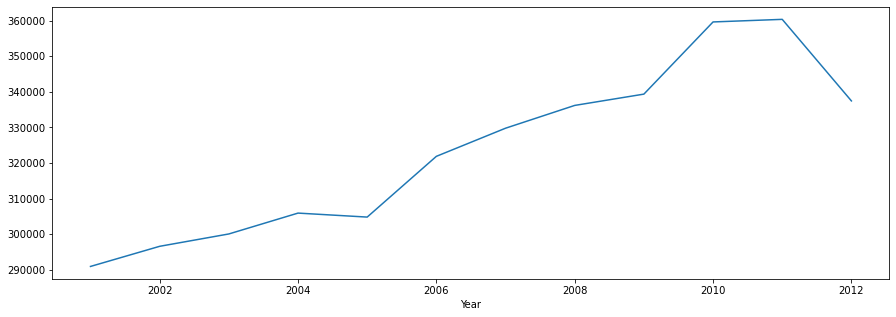

In [18]:
print("Total number of cases from 2001-12: \n",suicide_dataset.groupby('Year')['Total'].sum())
suicide_dataset.groupby('Year')['Total'].sum().plot(kind="line", figsize =(15, 5))

**Cloncusion:** There is a constant increase in the number of cases and was at its peak in 2010 and 2011.

**2. Which year has shown recorded the highest number of suicides?**

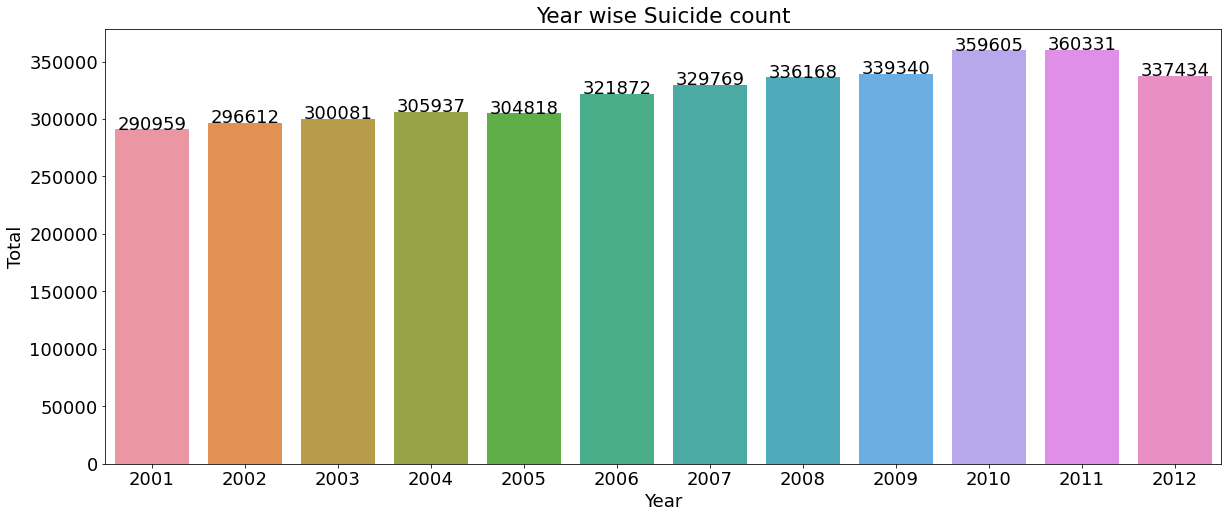

In [19]:
# Yearwise suicide count
yearwise= suicide_dataset[['Year', 'Total']].groupby('Year').sum()
yearwise.reset_index(inplace = True)
#yearwise
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,8)) 
# Make a plot size
trace = sns.barplot(x = yearwise['Year'], y = yearwise['Total'], data = yearwise)
# Adding values on the top of the bars
for index, row in yearwise.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Year wise Suicide count')    
plt.show()

In [20]:
round((yearwise['Total'].max() - yearwise['Total'].min())/yearwise['Total'].min()*100, 2)

23.84

**Conclusion:** Year **2011** recorded highest suicides i.e **360331**. 
From Year 2001 to 2011 sucides rate is increased by **23.84%**.

**3. Which gender tends to commit more suicide?**

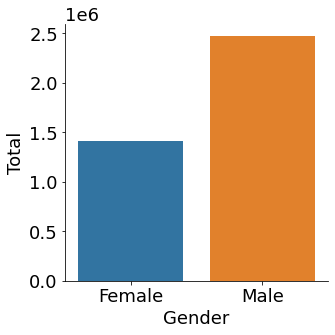

In [21]:
filter_gender = pd.DataFrame(suicide_dataset.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total", kind="bar", data=filter_gender)

**Conclusion:** Males are almost twice in number than females.

**4. In which states do people tend to commit more suicide?**

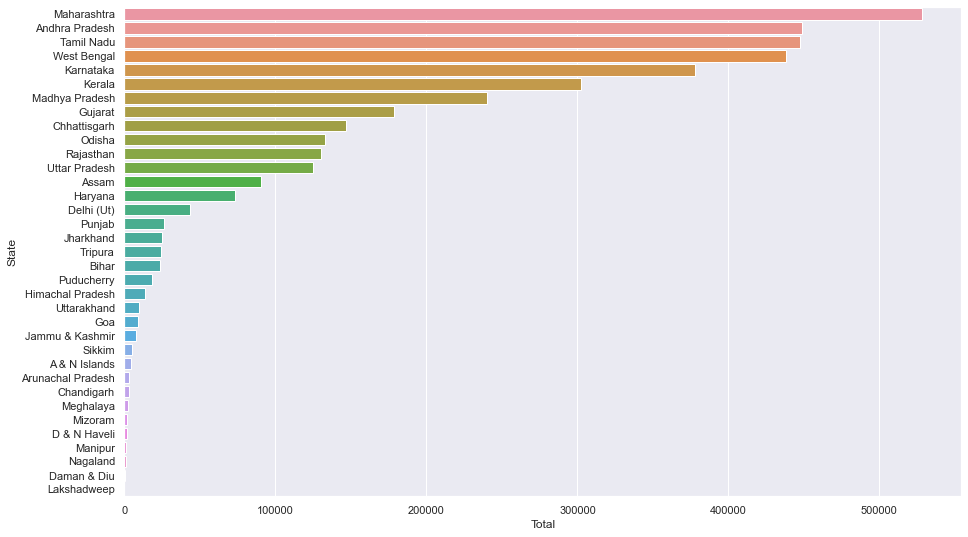

In [22]:
sns.set(rc={'figure.figsize':(15,9)})
filter_state = pd.DataFrame(suicide_dataset.groupby(["State"])["Total"].sum().sort_values(ascending=False)).reset_index()
sns.barplot(y = 'State', x = 'Total',data = filter_state)
plt.show()

**5. Top 5 States that recorded highest number of suicides**

In [23]:
#Top 5 States that recorded highest number of suicides
print('Top 5 States that recorded highest number of suicides')
print(filter_state.head(5))

Top 5 States that recorded highest number of suicides
            State   Total
0     Maharashtra  527942
1  Andhra Pradesh  448416
2      Tamil Nadu  447720
3     West Bengal  437923
4       Karnataka  377675


**Conclusion:** Maharashtra has maximum number of suicide cases.

**6. State which shows major suicide cases due to unemployment**

In [24]:
umemployement_set = suicide_dataset.query('Type == "Unemployment"')
umemployement_set = umemployement_set[['State','Type']].groupby(['State'])['Type'].count().nlargest(1)
umemployement_set

State
A & N Islands    120
Name: Type, dtype: int64

**Conclusion :** Andaman & Nicobar Islands have large number of suicide cases due to Unemployment

**7. Distribution of male and female suicides amongst different age groups**

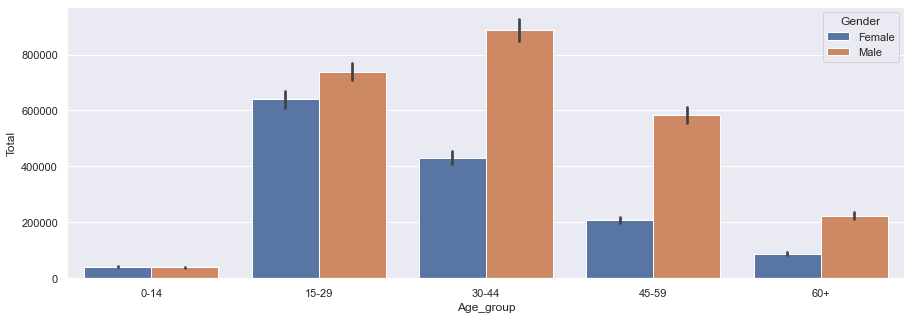

In [25]:
temp = suicide_dataset[ ~(suicide_dataset['Age_group'] == '0-100+')]
plt.figure(figsize=(15,5))
sns.barplot(data=temp, x='Age_group', y='Total', hue='Gender', estimator=np.sum)
del temp

**Conclusion:** Males of age group 30-44 commits more suicide and Female of age group 15-29 commits more suicide.

**8. Means adopted to commit suicide**

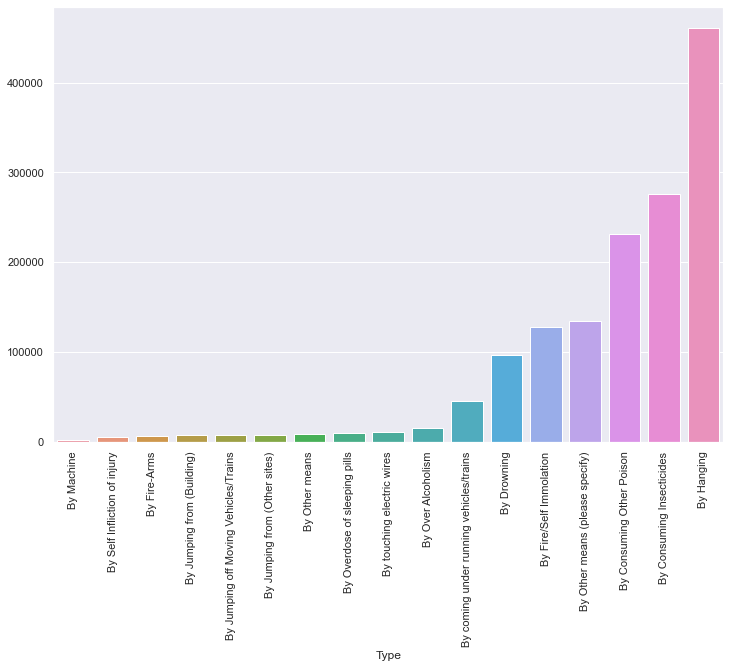

In [26]:
means_adopted_df = suicide_dataset[suicide_dataset['Type_code']=='Means_adopted']
plt.figure(figsize=(12,8))
temp = means_adopted_df.groupby(by='Type')['Total'].sum().sort_values()
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
del temp

**Conclusion:** Hanging is the most common means adopted by people to commit suicide.

**9. Major reasons for suicide attempt**

In [27]:
reasons_set = suicide_dataset[suicide_dataset['Type_code'] == 'Causes']
pd.options.mode.chained_assignment = None
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Causes Not known', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
reasons_set.loc[reasons_set['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

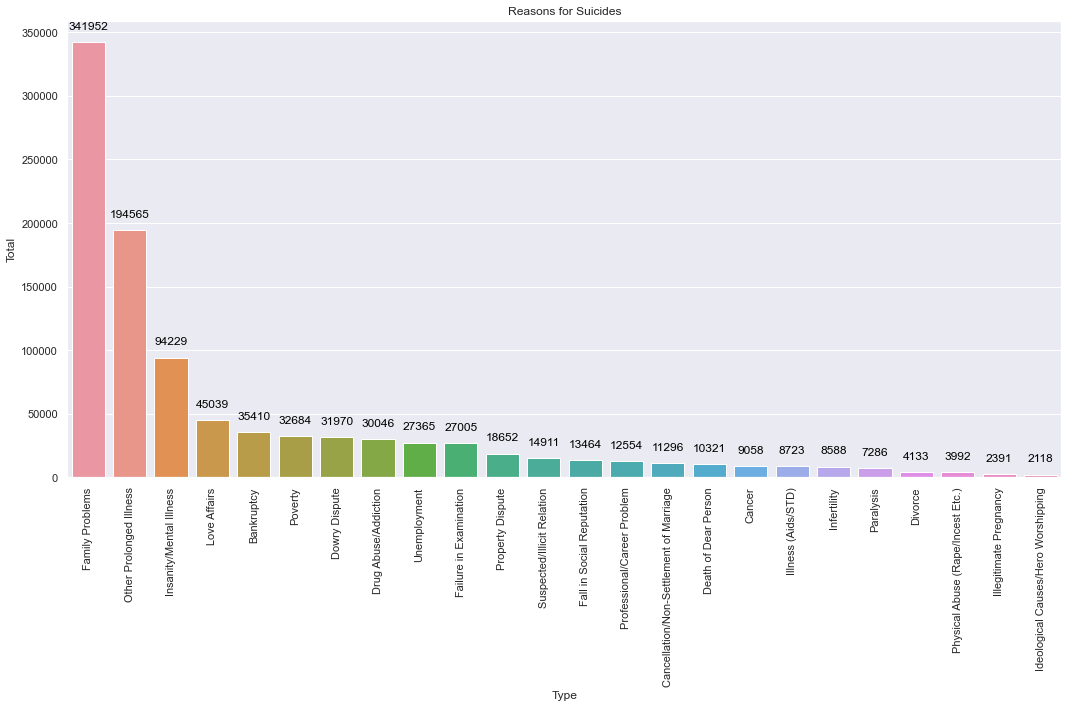

In [28]:
set1 = reasons_set[['Type','Total']]
set1 = set1.groupby('Type').sum()
set1.reset_index(inplace = True)
set1 = set1.sort_values('Total', ascending = False)
set1 = set1.reset_index(drop=True)
plt.rcParams.update({'font.size': 12})
# Make a plot size
plt.figure(figsize= (15,10))
trace = sns.barplot(x = set1['Type'], y = set1['Total'], data = set1, orient = 'v')
# Adding values on the top of the bars
for index, row in set1.iterrows():
    trace.text(x = row.name, y = row.Total+ 10000, s = str(row.Total),color='black', ha="center")
plt.title('Reasons for Suicides')    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**Conclusion :** Family Problems, Illness, Love afairs are in the top reasons list for suicide attempts

**10. Major reasons where women suicide rate is more than men**

In [29]:
# Reasons for Female suicides
gender_set = reasons_set[['Type', 'Gender', 'Total']]
male_set = gender_set[gender_set['Gender'] == 'Male']
male_set = male_set.groupby('Type').sum().reset_index()
male_set = male_set.sort_values('Total', ascending = False)
male_set = male_set.reset_index(drop=True)
female_set = gender_set[gender_set['Gender'] == 'Female']
female_set = female_set.groupby('Type').sum().reset_index()
female_set = female_set.sort_values('Total', ascending = False)
female_set = female_set.reset_index(drop=True)
total_set = pd.concat([female_set, male_set], axis = 1)
total_set.columns = ['Type', 'Female', 't', 'Male']
total_set = total_set.drop(columns = ['t'])
female_more = total_set[total_set['Female'] > total_set['Male']]
female_more

,Type,Female,Male
3,Dowry Dispute,31206,31175.0
18,Divorce,2535,2521.0
19,Illegitimate Pregnancy,2391,1598.0
20,Paralysis,2284,1342.0
21,Professional/Career Problem,1596,1330.0
22,Drug Abuse/Addiction,1205,764.0


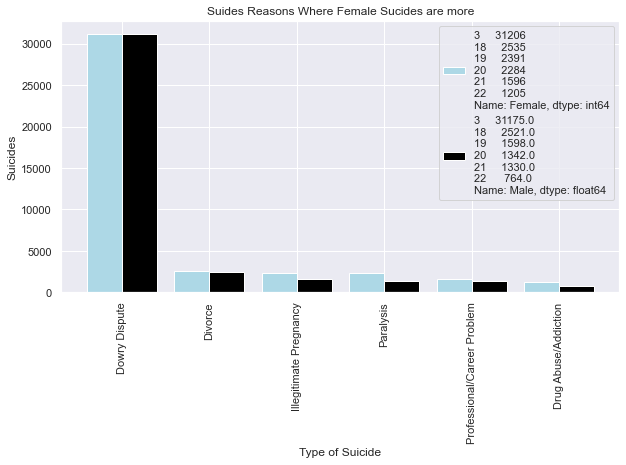

In [30]:
fig = plt.figure(figsize=(10,5))
N= len(female_more)
ind = np.arange(N); width = 0.4 
category = list(female_more['Type'])
plt.bar(x = ind, height = 'Female', data = female_more, width = width, label = 'Female',color = 'lightblue')
plt.bar(x = ind+width, height = 'Male', data = female_more, width = width, label = 'Male',color = 'black')
plt.xlabel("Type of Suicide") 
plt.ylabel("Suicides")
plt.title("Suides Reasons Where Female Sucides are more")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

**Conclusion :** Dowry Dispute , Infertility , Physical abuse have been the reasons where the Women suicide rate is more than men.

<font size="5">**Data Modeling & Prediction**</font>

In [31]:
#Copy of the suicide dataset where state is Bihar (For prediction purpose)
bihar_df = suicide_dataset[suicide_dataset['State'] == 'Bihar'].copy()
bihar_df

,State,Year,Type_code,Type,Gender,Age_group,Total
26996,Bihar,2001,Causes,Drug Abuse/Addiction,Female,0-14,0
26997,Bihar,2001,Causes,Not having Children(Barrenness/Impotency,Female,0-14,0
26998,Bihar,2001,Causes,Fall in Social Reputation,Female,0-14,0
26999,Bihar,2001,Causes,Dowry Dispute,Female,0-14,0
27000,Bihar,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
...,...,...,...,...,...,...,...
33771,Bihar,2012,Professional_Profile,Service (Government),Male,60+,0
33772,Bihar,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,5
33773,Bihar,2012,Professional_Profile,Professional Activity,Male,60+,0
33774,Bihar,2012,Professional_Profile,Student,Male,60+,0


In [32]:
#Grouping the records by year and calculating the total cases in a particular year
bihar_df = bihar_df.groupby(['Year']).sum()
bihar_df.reset_index(inplace=True)
bihar_df

,Year,Total
0,2001,1596
1,2002,1867
2,2003,1492
3,2004,938
4,2005,1370
5,2006,1644
6,2007,2606
7,2008,2487
8,2009,2617
9,2010,2995


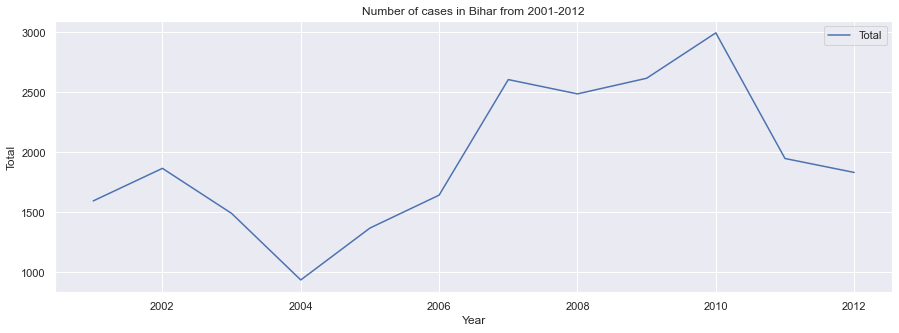

In [33]:
#Number of cases in bihar from 2001-2012
bihar_df.plot(x='Year', y='Total', figsize =(15, 5))
plt.title('Number of cases in Bihar from 2001-2012')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()

In [34]:
#Building the model to predict the actual total number of cases in Bihar
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
X = bihar_df[['Year']] 
y = bihar_df['Total']

#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.3,random_state=10)

lin=LinearRegression()
lin.fit(X_train,Y_train)
ypred=lin.predict(X_test)

df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': ypred})
df

,Actual Value,Predicted Value
2,1492,1586.617647
6,2606,1916.225490
7,2487,1998.627451
5,1644,1833.823529


In [35]:
#Building the model to predict the total number of cases in Bihar
X = bihar_df[['Year']]
y = bihar_df['Total']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.25,random_state=10)

model = LinearRegression()
model.fit(X, y)

data = [[2001]]
X_predict = pd.DataFrame(data, columns = ['Year']) 

y_predict = model.predict(X_predict)

df = pd.DataFrame({'Predicted Value': y_predict})
df

,Predicted Value
0,1438.461538
